# Power Spectrum


In [1]:
import numpy as np
import pycic

import matplotlib.pyplot as plt
plt.style.use('ggplot')

pk_tab = np.loadtxt("./data/power.csv", delimiter = ',')
pso    = pycic.cicPowerSpectrum(pk_tab)

pso.normalise(0.8) # normalise the power with sigma8 = 0.8

def linpower(k):
    """ return the normalised linear power """
    return pso.power(np.log(k), normalise = True)

# let kn = 2 h/Mpc
kn  = 2.

mps = pycic.cicMeasPowerSpectrum(linpower, kn = kn, )

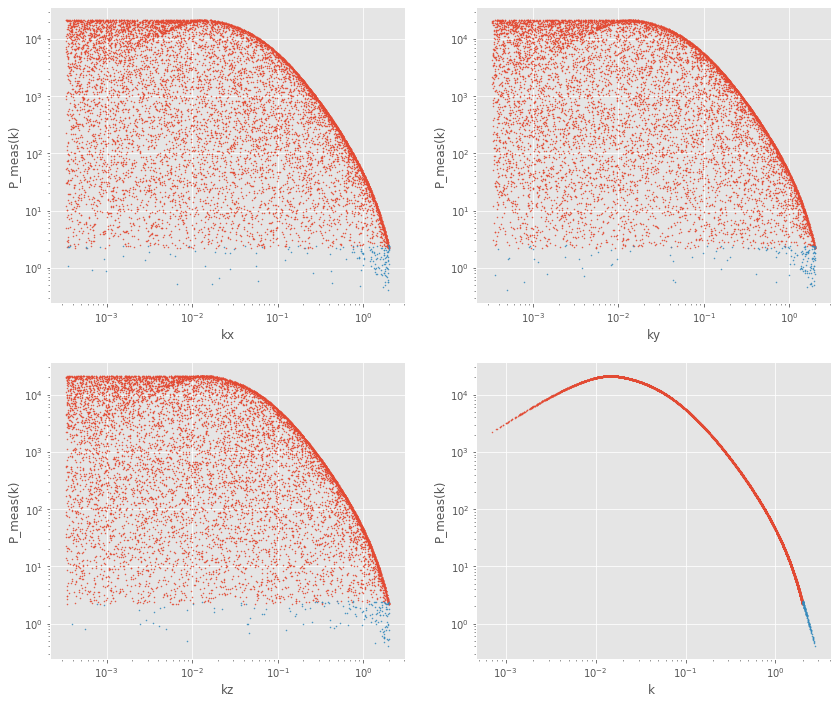

In [2]:
# all k vectors
kvec = np.exp(np.random.uniform(-8, np.log(kn), (10000, 3)))
klen = np.sqrt(np.sum(kvec**2, axis = -1))

# full power spectrum (power law contd.)
mpk = mps(kvec)

fig, axs = plt.subplots(2, 2, figsize = (14, 12))

for _axi, _ki, _i in zip(axs.flatten(), [*kvec.T, klen], "xyz "):
    mask = np.where(klen < kn, True, False)
    _axi.loglog(_ki[mask], mpk[mask], 'o', ms = .5, color = 'C0')
    _axi.loglog(_ki[~mask], mpk[~mask], 'o', ms = .5, color = 'C1')
    _axi.set_xlabel('k' + _i); _axi.set_ylabel('P_meas(k)')
        

plt.show()

In [4]:
from scipy.stats import binned_statistic

binned_statistic(np.log(klen), np.log(mpk), statistic = 'mean', bins = 100, )

BinnedStatisticResult(statistic=array([1.69289771e+04, 1.40731313e+04, 8.78864465e+03, 5.74738409e+03,
       4.09620998e+03, 2.96889281e+03, 2.21081393e+03, 1.72656717e+03,
       1.35994384e+03, 1.09854240e+03, 9.01723468e+02, 7.48907821e+02,
       6.26126172e+02, 5.34077174e+02, 4.57488041e+02, 3.94681621e+02,
       3.44078230e+02, 3.01602128e+02, 2.63412424e+02, 2.32329118e+02,
       2.06847705e+02, 1.85086282e+02, 1.64344677e+02, 1.47410345e+02,
       1.32395028e+02, 1.19920725e+02, 1.08039778e+02, 9.82841022e+01,
       8.86940989e+01, 8.07809830e+01, 7.35239909e+01, 6.68592454e+01,
       6.13566696e+01, 5.59434167e+01, 5.12656452e+01, 4.67757054e+01,
       4.31205781e+01, 3.93314336e+01, 3.63990792e+01, 3.33625334e+01,
       3.08909495e+01, 2.82474557e+01, 2.59453850e+01, 2.40665820e+01,
       2.21954778e+01, 2.03913201e+01, 1.88632028e+01, 1.73279284e+01,
       1.59945596e+01, 1.47954526e+01, 1.35555800e+01, 1.26235083e+01,
       1.17067475e+01, 1.06955583e+01, 9.8901

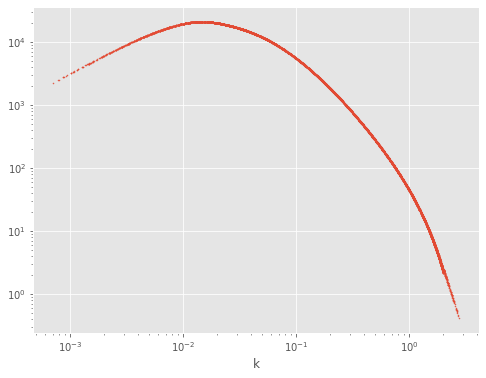

In [3]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

ax.loglog(klen, mpk, 'o', ms = .5, color = 'C0')
ax.set_xlabel('k'); _axi.set_ylabel('P_meas(k)')

plt.show()